### Bar Samplizing

In [4]:
from quant_free.finml.barsampling.core import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_parquet('./research/Data/IVEfuture.parquet')

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
bar = StandardBarFeatures(file_path_or_df = data)

### 1. Standard Bar

Bar sampling techniques are so common in the financial industry that most data providers offer multiple APIs for them. The purpose of these techniques is to transform irregularly spaced time series observations into homogeneous series derived from regular sampling.



#### 1.1 Time Bar

Time Bars are created by sampling information at fixed time intervals, for example, getting data every minute. The data typically obtained includes:


- Time Stamp
- Volume Weighted Average Price
- Open Price
- Close Price
- High Price
- Low Price
- Volume weights

While Time Bars may be the most common among experts and academics, there are two reasons why their use should be limited. First, markets do not process information at fixed time intervals. The first hour after market opening has much more active trading than an hour at noon. As biological beings, humans naturally follow daytime cycles. However, today's financial markets are operated by algorithms that don't require much human supervision, making CPU processing cycles more important than time intervals. This means Time Bars oversample during periods of low trading activity while undersampling during high activity periods. Second, time-sampled series often exhibit poor statistical properties, including Serial Correlation, Heteroscedasticity, and non-normality (Easley, Lopez de Prado & O'Hara, 2012). The GARCH model was developed to address heteroscedasticity resulting from improper sampling. As we'll explain later, forming samples based on trading activity volume can address these issues upfront.

#### 1.2 Tick Bar

The basic idea of Tick Bar is simple. It extracts the previously listed variables whenever a predetermined number of trades occur. This allows synchronization between information arrival and sampling.
 


In [6]:
tick = bar.tick_bar(threshold = 600)
tick

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 



,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 10:24:04,600,50.790,51.2900,50.7100,51.250,191164,130023,600,9.780588e+06
1,2009-09-28 11:51:42,1200,51.250,51.4360,51.2300,51.430,176724,98400,600,9.072843e+06
2,2009-09-28 14:09:28,1800,51.430,51.6000,51.4060,51.440,157179,89990,600,8.090282e+06
3,2009-09-28 15:09:12,2400,51.440,51.5300,51.3936,51.430,205400,69674,600,1.056945e+07
4,2009-09-29 10:03:18,3000,51.430,51.9600,51.3790,51.520,149219,86863,600,7.700035e+06
...,...,...,...,...,...,...,...,...,...,...
18813,2024-03-28 09:56:43,11288400,185.420,186.8400,185.3801,186.310,136707,49847,600,2.544512e+07
18814,2024-03-28 12:07:45,11289000,186.330,186.7900,186.3200,186.779,139200,61683,600,2.597304e+07
18815,2024-03-28 13:50:23,11289600,186.765,186.8050,186.5750,186.755,94342,48459,600,1.761582e+07
18816,2024-03-28 15:00:52,11290200,186.750,187.0200,186.6950,186.980,116615,62116,600,2.178476e+07


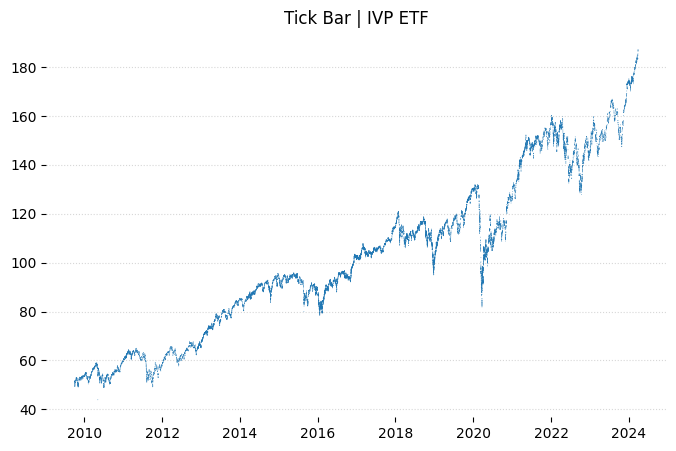

In [8]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(tick['date_time'], tick['close'], marker = '.', s = 1, edgecolor = 'none')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('Tick Bar | IVP ETF')
plt.show()

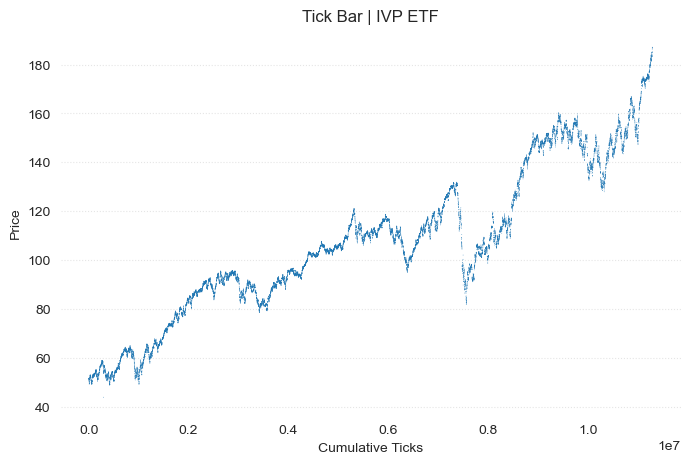

In [31]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    tick['cum_ticks'].cumsum(), 
    tick['close'], 
    marker = '.', 
    s = 1, 
    edgecolor = 'none'
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Cumulative Ticks')
plt.ylabel('Price')
plt.title('Tick Bar | IVP ETF')
plt.show()

In [9]:
#tick.to_parquet('../../Data/tick_IVEfuture.parquet')

#### 1.3 Volume Bar

One of the problems with Tick Bars is that order fragmentation makes the number of ticks arbitrary. For example, suppose there is a pending order size of 10. If you buy 10 lots, that trade will be recorded as a single tick. Conversely, if there are 10 orders of size 1 queued up, the trades will be recorded as 10 separate transactions. Additionally, price matching engine protocols can split a single order execution into multiple artificial partial order executions for operational convenience. Volume Bars solve this by sampling whenever a predefined unit of securities trading occurs. For example, regardless of the number of ticks, price sampling can be done every time futures contracts are traded in units of 1000.


In [11]:
volume = bar.volume_bar(threshold = 10000)
volume

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 



,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:41:53,48,50.7900,50.8500,50.7100,50.8400,10144,5364,48,5.152712e+05
1,2009-09-28 09:46:35,81,50.8500,51.0700,50.8300,51.0700,11900,9900,33,6.068960e+05
2,2009-09-28 09:47:25,106,51.0700,51.0700,51.0500,51.0600,10000,9900,25,5.106420e+05
3,2009-09-28 09:53:47,148,51.0600,51.1500,51.0600,51.1300,10824,8174,42,5.532435e+05
4,2009-09-28 09:54:34,180,51.1300,51.1400,51.1300,51.1300,10851,4451,32,5.548561e+05
...,...,...,...,...,...,...,...,...,...,...
230088,2024-03-28 15:58:21,11290844,187.0200,187.0800,186.9200,187.0400,10607,4840,68,1.983940e+06
230089,2024-03-28 15:59:32,11290915,187.0400,187.1000,186.9700,187.0400,10072,2778,71,1.883893e+06
230090,2024-03-28 15:59:53,11290999,187.0600,187.0650,186.8500,186.8500,10047,3600,84,1.878318e+06
230091,2024-03-28 16:00:00,11291062,186.8500,186.8900,186.7700,186.8100,30020,22083,63,5.608132e+06


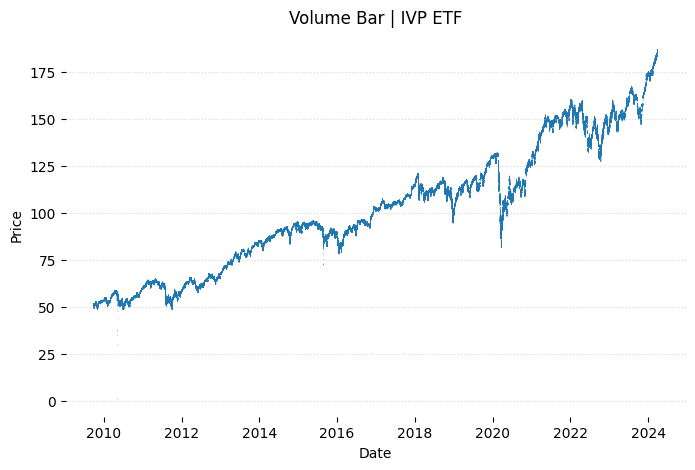

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(volume['date_time'], volume['close'], marker = '.', s = 1, edgecolor = 'none')
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Volume Bar | IVP ETF')
plt.show()

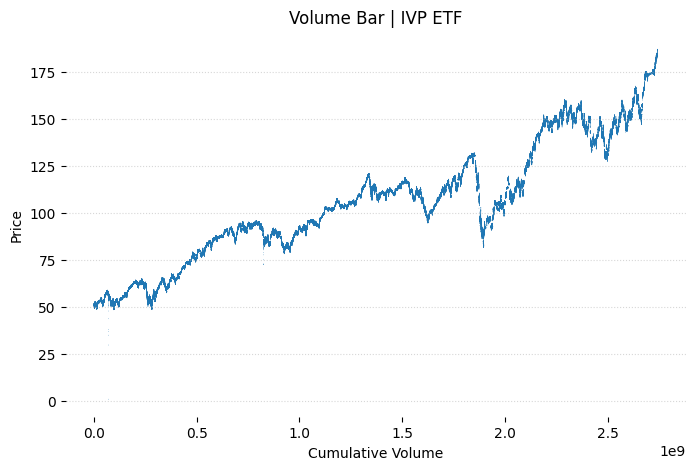

In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    volume['volume'].cumsum(),
    volume['close'],
    marker = '.', 
    s = 1, 
    edgecolor = 'none',
    alpha = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Cumulative Volume')
plt.ylabel('Price')
plt.title('Volume Bar | IVP ETF')
plt.show()

In [58]:
#volume.to_csv('../../Data/volume_IVEfuture.csv', index = False)

#### 1.4 Dollar Value Bar

Dollar Value Bar is a sampling method that extracts observations whenever a predetermined market value is traded. Let's look at some examples that provide theoretical justification for using Dollar Bars. First, consider analyzing a stock that has increased 100% in price over a certain period. If you want to sell $1000 worth of that stock at the end of the period, you only need to sell half of what was worth $1000 at the beginning of the period. In other words, the number of shares traded is a function of the actual traded value. Therefore, sampling based on traded value is more rational than using ticks or volume, especially when analyzing large price movements. This can be proven empirically. When calculating tick bars and volume bars of E-mini S&P 500 futures with a given bar size, the number of daily bars varies significantly year by year. However, when calculated with fixed-size daily dollar value bars, the range and speed of annual variation decreases. The figure below shows the exponentially weighted average number of daily bars when applying tick, volume, and dollar value sampling methods with fixed bar sizes.


In [17]:
dollar = bar.dollar_bar()
dollar

Reading data in batches:
Batch number: 0
Batch number: 1
Batch number: 2
Batch number: 3
Batch number: 4
Batch number: 5
Batch number: 6
Batch number: 7
Batch number: 8
Batch number: 9
Batch number: 10
Batch number: 11
Returning bars 



,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:46:34,80,50.7900,51.0700,50.7100,51.0700,20044,13264,80,1.020027e+06
1,2009-09-28 09:52:47,142,51.0700,51.1480,51.0500,51.1300,21024,19774,62,1.073986e+06
2,2009-09-28 09:54:38,201,51.1400,51.1500,51.1290,51.1300,19951,6951,59,1.020145e+06
3,2009-09-28 09:55:26,243,51.1300,51.1500,51.1300,51.1400,19652,18052,42,1.004999e+06
4,2009-09-28 10:02:48,339,51.1400,51.2600,51.0800,51.2500,19943,11354,96,1.020512e+06
...,...,...,...,...,...,...,...,...,...,...
236729,2024-03-28 15:59:53,11290981,187.0200,187.0200,186.8700,186.8900,5399,1400,46,1.009237e+06
236730,2024-03-28 15:59:56,11291032,186.8900,186.8900,186.8200,186.8200,5908,1808,51,1.103962e+06
236731,2024-03-28 15:59:59,11291059,186.8200,186.8241,186.7700,186.7700,5488,751,27,1.025128e+06
236732,2024-03-28 16:00:00,11291062,186.7700,186.8100,186.7700,186.8100,20424,20224,3,3.815399e+06


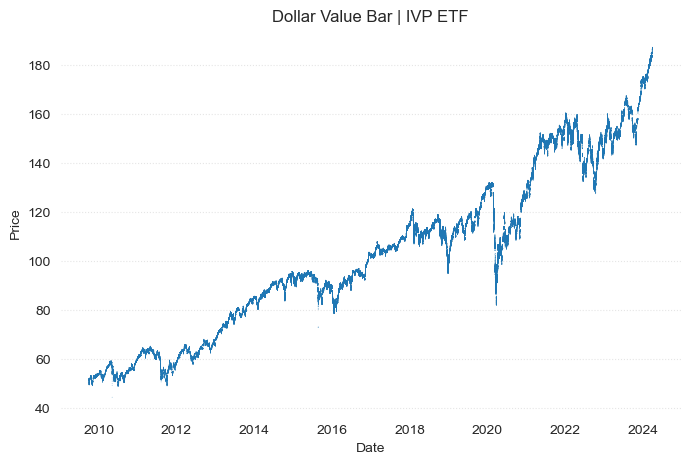

In [32]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    dollar['date_time'], 
    dollar['close'],
    marker = '.', 
    s = 1, 
    edgecolor = 'none',
    alpha = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dollar Value Bar | IVP ETF')
plt.show()

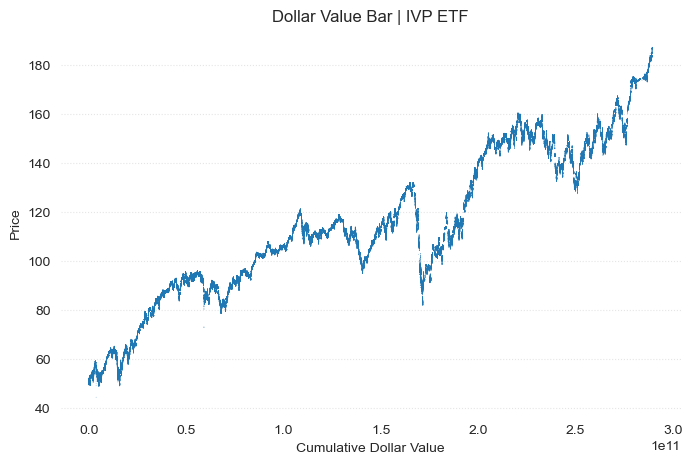

In [23]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(
    dollar['cum_dollar_value'].cumsum(), 
    dollar['close'],
    marker = '.', 
    s = 1, 
    edgecolor = 'none',
    alpha = 0.75
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Cumulative Dollar Value')
plt.ylabel('Price')
plt.title('Dollar Value Bar | IVP ETF')
plt.show()

In [24]:
#dollar.to_csv('../../Data/dollar_IVEfuture.csv', index = False)

#### Bar Counting

In [25]:
data.index = data['date']
tick.index = tick['date_time']
volume.index = volume['date_time']
dollar.index = dollar['date_time']

In [26]:
time_count = data['price'].resample('W', label = 'right').count()
tick_count = tick['close'].resample('W', label = 'right').count()
volume_count = volume['close'].resample('W', label = 'right').count()
dollar_count = dollar['close'].resample('W', label = 'right').count()

In [27]:
count_df = pd.concat([time_count, tick_count, volume_count, dollar_count], axis = 1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']
count_df

,time,tick,volume,dollar
2009-10-04,14151,23,318,165
2009-10-11,8792,15,196,103
2009-10-18,9727,16,200,106
2009-10-25,12453,21,249,133
2009-11-01,13525,22,303,155
...,...,...,...,...
2024-03-03,8466,14,166,292
2024-03-10,11133,19,202,357
2024-03-17,13568,23,229,399
2024-03-24,8705,14,162,283


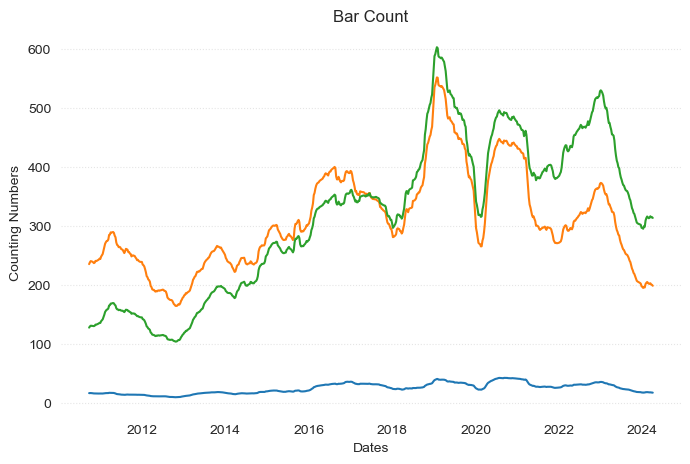

In [29]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    count_df.iloc[:,1:].rolling(window = 52).mean()
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel('Dates')
plt.ylabel('Counting Numbers')
plt.title('Bar Count')
plt.show()